<a href="https://colab.research.google.com/github/Vivek-23-Titan/Crowd_Detection/blob/master/Xception_Crowd_Control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import all the necessary Libraries#

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras.optimizers import Adam
from keras import initializers
from keras.utils import plot_model, np_utils
from keras import backend as K
from google.colab.patches import cv2_imshow
##used for transfer learning
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


#Link Drive for obtaining the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#Copy the model weight file
%cd /content/drive/My Drive/Crowd_Control/Dataset and Paper/
%cp Copy_of_Five_ClassDataset.zip Five_ClassDataset.zip
%ls

#Move the copied Tiny weight file
!mv Five_ClassDataset.zip /content/

%cd /content/
%ls

/content/drive/.shortcut-targets-by-id/1txhspqlWXxVHAc3K5WpgpvGwogLIEY-q/Dataset and Paper
 39.pf.doc
'Copy of Five_ClassDataset.zip'
 Copy_of_Five_ClassDataset.zip
'Copy_of_Five_ClassDataset.zip (Unzipped Files)'/
 Five_ClassDataset.zip
/content
drive/  Five_ClassDataset.zip  sample_data/


In [ ]:
from zipfile import ZipFile
file_name = '/content/Five_ClassDataset.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

done


#Prepare the Data for training and testing

In [ ]:
import glob
import cv2
import PIL
from PIL import ImageOps

path = glob.glob(r"/content/Dataset/Train/Train_High/*")
X_train1 = []
Y_train1 = []
dim = (150,150) # (width = cols, height = rows)

for img in path:
    n = cv2.imread(img)    
    resized = cv2.resize(n, dim)
    X_train1.append(resized)
    Y_train1.append([0])

Y_train1 = np.array(Y_train1)

In [ ]:
import glob
import cv2
import PIL
from PIL import ImageOps

path = glob.glob(r"/content/Dataset/Train/Train_Low/*")
X_train2 = []
Y_train2 = []
dim = (150,150) # (width = cols, height = rows)

for img in path:
    n = cv2.imread(img)    
    resized = cv2.resize(n, dim)
    X_train2.append(resized)
    Y_train2.append([1])

Y_train2 = np.array(Y_train2)

In [ ]:
import glob
import cv2
import PIL
from PIL import ImageOps

path = glob.glob(r"/content/Dataset/Train/Train_Moderate/*")
X_train3 = []
Y_train3 = []
dim = (150,150) # (width = cols, height = rows)

for img in path:
    n = cv2.imread(img)    
    resized = cv2.resize(n, dim)
    X_train3.append(resized)
    Y_train3.append([2])

Y_train3 = np.array(Y_train3)

In [ ]:
import glob
import cv2
import PIL
from PIL import ImageOps

path = glob.glob(r"/content/Dataset/Train/Train_VeryLow/*")
X_train4 = []
Y_train4 = []
dim = (150,150) # (width = cols, height = rows)

for img in path:
    n = cv2.imread(img)    
    resized = cv2.resize(n, dim)
    X_train4.append(resized)
    Y_train4.append([3])

Y_train4 = np.array(Y_train4)

In [ ]:
import glob
import cv2
import PIL
from PIL import ImageOps

path = glob.glob(r"/content/Dataset/Train/Train_VeryHigh/*")
X_train5 = []
Y_train5 = []
dim = (150,150) # (width = cols, height = rows)

for img in path:
    n = cv2.imread(img)    
    resized = cv2.resize(n, dim)
    X_train5.append(resized)
    Y_train5.append([4])

Y_train5 = np.array(Y_train5)

**Train Dataset**

In [ ]:
X_train = np.concatenate((X_train1,X_train2,X_train3,X_train4,X_train5))
Y_train = np.concatenate((Y_train1,Y_train2,Y_train3,Y_train4,Y_train5))

X_train = np.array(X_train)
Y_train = np.array(Y_train)

X = X_train
Y = Y_train
print(X_train.shape)
print(Y_train.shape)

(4500, 150, 150, 3)
(4500, 1)


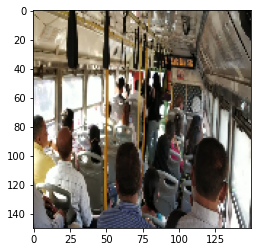

In [ ]:
plt.imshow(cv2.cvtColor(X_train[0], cv2.COLOR_BGR2RGB))

In [ ]:
path = glob.glob(r"/content/Dataset/Test/Test_High/*")
X_test1 = []
Y_test1 = []
dim = (150,150) # (width = cols, height = rows)

for img in path:
    n = cv2.imread(img)    
    resized = cv2.resize(n, dim)
    X_test1.append(resized)
    Y_test1.append([0])

Y_test1 = np.array(Y_test1)

In [ ]:
path = glob.glob(r"/content/Dataset/Test/Test_Low/*")
X_test2 = []
Y_test2 = []
dim = (150,150) # (width = cols, height = rows)

for img in path:
    n = cv2.imread(img)    
    resized = cv2.resize(n, dim)
    X_test2.append(resized)
    Y_test2.append([1])

Y_test2 = np.array(Y_test2)

In [ ]:
path = glob.glob(r"/content/Dataset/Test/Test_Moderate/*")
X_test3 = []
Y_test3 = []
dim = (150,150) # (width = cols, height = rows)

for img in path:
    n = cv2.imread(img)    
    resized = cv2.resize(n, dim)
    X_test3.append(resized)
    Y_test3.append([2])

Y_test3 = np.array(Y_test3)

In [ ]:
path = glob.glob(r"/content/Dataset/Test/Test_VeryLow/*")
X_test4 = []
Y_test4 = []
dim = (150,150) # (width = cols, height = rows)

for img in path:
    n = cv2.imread(img)    
    resized = cv2.resize(n, dim)
    X_test4.append(resized)
    Y_test4.append([3])

Y_test4 = np.array(Y_test4)

In [ ]:
path = glob.glob(r"/content/Dataset/Test/Test_VeryHigh/*")
X_test5 = []
Y_test5 = []
dim = (150,150) # (width = cols, height = rows)

for img in path:
    n = cv2.imread(img)    
    resized = cv2.resize(n, dim)
    X_test5.append(resized)
    Y_test5.append([4])

Y_test5 = np.array(Y_test5)

**Test Dataset**

In [ ]:
X_test = np.concatenate((X_test1, X_test2, X_test3, X_test4, X_test5))
Y_test = np.concatenate((Y_test1, Y_test2, Y_test3, Y_test4, Y_test5))

X_test = np.array(X_test)
Y_test = np.array(Y_test)

X = X_test
Y = Y_test
print(X_test.shape)
print(Y_test.shape)

(1500, 150, 150, 3)
(1500, 1)


**Change the labels to one-hot encoded vectors**

In [ ]:
y_train_hot = np_utils.to_categorical(Y_train)
print('New y_train shape: ', y_train_hot.shape)

y_test_hot = np_utils.to_categorical(Y_test)
print('New y_test shape: ', y_test_hot.shape)

New y_train shape:  (4500, 5)
New y_test shape:  (1500, 5)


**Normalizing the image dataset**

In [ ]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

**Import the Xception model**

In [ ]:
from tensorflow.keras.applications import Xception # TensorFlow ONLY

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

#Build the Xception base model

In [ ]:
base_model = keras.applications.Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

In [ ]:
base_model.trainable = False

#Add new layers on the top of the pre-trained model

In [ ]:
inputs = keras.Input(shape=(150, 150, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
#x = keras.layers.MaxPooling2D()(x)
# A Dense classifier with a single unit (binary classification)
x = keras.layers.Dropout(0.5)(x) 
outputs = keras.layers.Dense(5, activation='softmax')(x)
model = keras.Model(inputs, outputs)

**Start training**

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=[keras.metrics.CategoricalAccuracy()])
history = model.fit(X_train,y_train_hot, batch_size=100, epochs=10, validation_data=(X_test, y_test_hot), shuffle= True)

Epoch 1/10
45/45 [==============================] - 25s 551ms/step - loss: 1.2306 - categorical_accuracy: 0.7444 - val_loss: 1.0246 - val_categorical_accuracy: 0.9667
Epoch 2/10
45/45 [==============================] - 24s 537ms/step - loss: 1.0000 - categorical_accuracy: 0.9469 - val_loss: 0.9734 - val_categorical_accuracy: 0.9813
Epoch 3/10
45/45 [==============================] - 24s 536ms/step - loss: 0.9586 - categorical_accuracy: 0.9753 - val_loss: 0.9675 - val_categorical_accuracy: 0.9813
Epoch 4/10
45/45 [==============================] - 24s 535ms/step - loss: 0.9443 - categorical_accuracy: 0.9842 - val_loss: 0.9690 - val_categorical_accuracy: 0.9733
Epoch 5/10
45/45 [==============================] - 24s 534ms/step - loss: 0.9330 - categorical_accuracy: 0.9920 - val_loss: 0.9591 - val_categorical_accuracy: 0.9760
Epoch 6/10
45/45 [==============================] - 24s 539ms/step - loss: 0.9279 - categorical_accuracy: 0.9940 - val_loss: 0.9498 - val_categorical_accuracy: 0.984

In [ ]:
history = model.fit(X_train,y_train_hot, batch_size=100, epochs=1, validation_data=(X_test, y_test_hot), shuffle= True)

45/45 [==============================] - 24s 532ms/step - loss: 0.9061 - categorical_accuracy: 0.9996 - val_loss: 0.9221 - val_categorical_accuracy: 0.9873


#Results

In [ ]:
loss, acc = model.evaluate(X_test, y_test_hot)
print('Loss:', loss,'Acc:', acc*100)

47/47 [==============================] - 7s 139ms/step - loss: 0.9216 - categorical_accuracy: 0.9913
Loss: 0.9216066598892212 Acc: 99.13333058357239


In [ ]:
loss, acc = model.evaluate(X_train, y_train_hot)
print('Loss:', loss,'Acc:', acc*100)

141/141 [==============================] - 20s 140ms/step - loss: 0.9056 - categorical_accuracy: 1.0000
Loss: 0.9056380987167358 Acc: 100.0


**Training history**

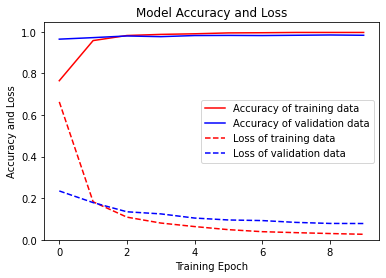

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       900
           1       1.00      1.00      1.00       900
           2       1.00      1.00      1.00       900
           3       1.00      1.00      1.00       900
           4       1.00      1.00      1.00       900

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500



In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['categorical_accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_categorical_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

# Print confusion matrix for training data
y_pred_train = model.predict(X_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
print(classification_report(Y_train, max_y_pred_train))

**Confusion Matrix**

In [ ]:
LABELS = ['Test_High', 'Test_Low', 'Test_Moderate', 'Test_VeryHigh', 'Test_VeryLow']

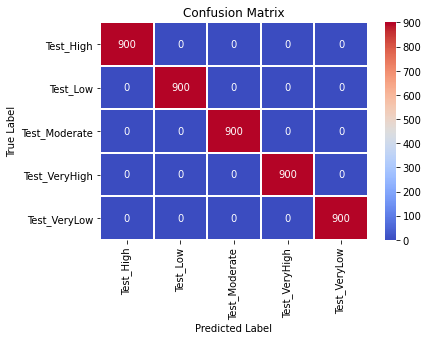

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       900
           1       1.00      1.00      1.00       900
           2       1.00      1.00      1.00       900
           3       1.00      1.00      1.00       900
           4       1.00      1.00      1.00       900

    accuracy                           1.00      4500
   macro avg       1.00      1.00      1.00      4500
weighted avg       1.00      1.00      1.00      4500



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import seaborn as sns


def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

y_pred_test = model.predict(X_train)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_train_hot, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

print(classification_report(max_y_test, max_y_pred_test))

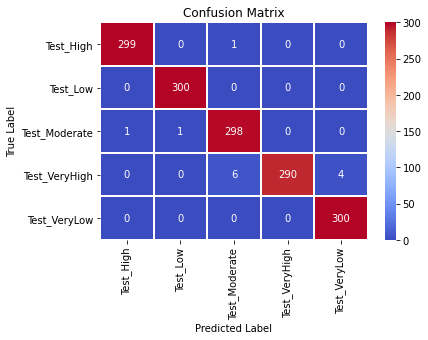

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       300
           1       1.00      1.00      1.00       300
           2       0.98      0.99      0.99       300
           3       1.00      0.97      0.98       300
           4       0.99      1.00      0.99       300

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import seaborn as sns


def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

y_pred_test = model.predict(X_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_hot, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

print(classification_report(max_y_test, max_y_pred_test))

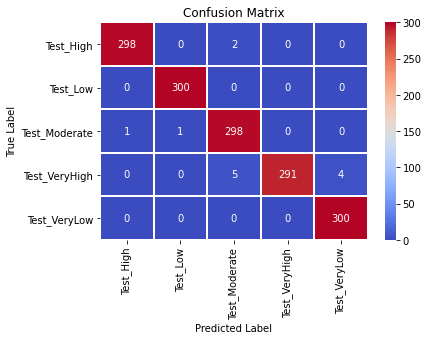

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       300
           1       1.00      1.00      1.00       300
           2       0.98      0.99      0.99       300
           3       1.00      0.97      0.98       300
           4       0.99      1.00      0.99       300

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import seaborn as sns


def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

y_pred_test = model.predict(X_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_hot, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

print(classification_report(max_y_test, max_y_pred_test))

[1]


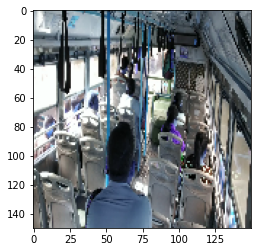

In [ ]:
i = 300
plt.imshow(X_test[i])
print(Y_test[i])